In [217]:
#importing libraries 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [218]:
from google.colab import files
uploaded=files.upload()

Saving Electric_Production.csv to Electric_Production (1).csv


In [219]:
#importing dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['Electric_Production.csv']))
time_steps=5

df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [220]:
df=list(df['IPG2211A2N'])

In [222]:
df

[72.5052,
 70.672,
 62.4502,
 57.4714,
 55.3151,
 58.0904,
 62.6202,
 63.2485,
 60.5846,
 56.3154,
 58.0005,
 68.7145,
 73.3057,
 67.9869,
 62.2221,
 57.0329,
 55.8137,
 59.9005,
 65.7655,
 64.4816,
 61.0005,
 57.5322,
 59.3417,
 68.1354,
 73.8152,
 70.062,
 65.61,
 60.1586,
 58.8734,
 63.8918,
 68.8694,
 70.0669,
 64.1151,
 60.3789,
 62.4643,
 70.5777,
 79.8703,
 76.1622,
 70.2928,
 63.2384,
 61.4065,
 67.1097,
 72.9816,
 75.7655,
 67.5152,
 63.2832,
 65.1078,
 73.8631,
 77.9188,
 76.6822,
 73.3523,
 65.1081,
 63.6892,
 68.4722,
 74.0301,
 75.0448,
 69.3053,
 65.8735,
 69.0706,
 84.1949,
 84.3598,
 77.1726,
 73.1964,
 67.2781,
 65.8218,
 71.4654,
 76.61399999999999,
 77.1052,
 73.061,
 67.4365,
 68.5665,
 77.6839,
 86.0214,
 77.5573,
 73.365,
 67.15,
 68.8162,
 74.8448,
 80.0928,
 79.1606,
 73.5743,
 68.7538,
 72.5166,
 79.4894,
 85.2855,
 80.1643,
 74.5275,
 69.6441,
 67.1784,
 71.2078,
 77.5081,
 76.5374,
 72.3541,
 69.0286,
 73.4992,
 84.5159,
 87.9464,
 84.5561,
 79.4747,
 71.0578

In [223]:
#Data Preparation

def data_preparation(df,steps):
  x,y=[],[]
  for i in range(len(df)):
    end=i+steps
    if(end<len(df)):
      seq_x=df[i:end]
      seq_y=df[end]
      x.append(seq_x)
      y.append(seq_y)
  return np.array(x),np.array(y)

In [224]:
x,y=data_preparation(df,time_steps)

In [225]:
x

array([[ 72.5052,  70.672 ,  62.4502,  57.4714,  55.3151],
       [ 70.672 ,  62.4502,  57.4714,  55.3151,  58.0904],
       [ 62.4502,  57.4714,  55.3151,  58.0904,  62.6202],
       ...,
       [102.1532, 112.1538, 108.9312,  98.6154,  93.6137],
       [112.1538, 108.9312,  98.6154,  93.6137,  97.3359],
       [108.9312,  98.6154,  93.6137,  97.3359, 114.7212]])

In [226]:
y

array([ 58.0904,  62.6202,  63.2485,  60.5846,  56.3154,  58.0005,
        68.7145,  73.3057,  67.9869,  62.2221,  57.0329,  55.8137,
        59.9005,  65.7655,  64.4816,  61.0005,  57.5322,  59.3417,
        68.1354,  73.8152,  70.062 ,  65.61  ,  60.1586,  58.8734,
        63.8918,  68.8694,  70.0669,  64.1151,  60.3789,  62.4643,
        70.5777,  79.8703,  76.1622,  70.2928,  63.2384,  61.4065,
        67.1097,  72.9816,  75.7655,  67.5152,  63.2832,  65.1078,
        73.8631,  77.9188,  76.6822,  73.3523,  65.1081,  63.6892,
        68.4722,  74.0301,  75.0448,  69.3053,  65.8735,  69.0706,
        84.1949,  84.3598,  77.1726,  73.1964,  67.2781,  65.8218,
        71.4654,  76.614 ,  77.1052,  73.061 ,  67.4365,  68.5665,
        77.6839,  86.0214,  77.5573,  73.365 ,  67.15  ,  68.8162,
        74.8448,  80.0928,  79.1606,  73.5743,  68.7538,  72.5166,
        79.4894,  85.2855,  80.1643,  74.5275,  69.6441,  67.1784,
        71.2078,  77.5081,  76.5374,  72.3541,  69.0286,  73.4

In [227]:
x.shape

(392, 5)

In [228]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features=1
x=x.reshape(x.shape[0],x.shape[1],n_features)

In [229]:
x.shape

(392, 5, 1)

**Building LSTM Model**

In [230]:
#Defining the model

model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(steps,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [231]:
#Model Fitting

model.fit(x,y,epochs=300,verbose=0)

In [232]:
#Function for predicting the output

def predict(df,steps,n_features,no_of_predictions):
  temp_input=list(df)
  output=[]
  n=len(df)-steps
  i=0
  for i in range(no_of_predictions):
    input=np.array(temp_input[n:])
    input=np.array(input)
    input=input.reshape(1,steps,n_features)
    yhat=model.predict(input,verbose=0)
    output.append(yhat[0][0])
    temp_input.append(yhat[0][0])
    n=n+1
  return output

In [233]:
no_of_predictions=50
result=predict(df,5,1,no_of_predictions)

In [234]:
result

[114.62442,
 106.947815,
 94.87273,
 94.81584,
 109.64005,
 119.41577,
 115.13508,
 105.613014,
 95.91761,
 98.436424,
 114.04206,
 123.06335,
 114.56082,
 106.32805,
 96.261154,
 98.51481,
 113.07392,
 122.88122,
 115.82162,
 106.66785,
 97.12699,
 99.58994,
 114.56569,
 124.169876,
 116.1106,
 107.361664,
 97.535255,
 99.96121,
 114.840385,
 124.62354,
 116.84687,
 107.831436,
 98.04504,
 100.5593,
 115.61148,
 125.34851,
 117.25798,
 108.3116,
 98.41095,
 100.949905,
 116.03274,
 125.82663,
 117.7317,
 108.69725,
 98.76802,
 101.35449,
 116.52102,
 126.31641,
 118.087036,
 109.04821]

In [235]:
#plotting the output using matplotlib

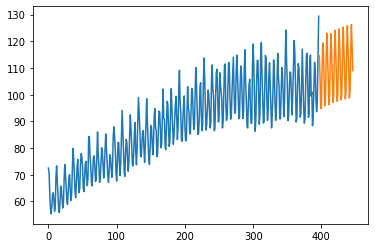

In [236]:
old=np.arange(len(df))
new=np.arange(len(df),no_of_predictions+len(df))

plt.plot(old,df)
plt.plot(new,result)